In [7]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [8]:
import statsmodels.api as sm
import itertools
from matplotlib.pylab import rcParams
plt.style.use('ggplot')
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error

# Import time series

In [3]:
import pickle
with open('./data/melted_zip4.pickle', 'rb') as file:
    melted_zip4 = pickle.load(file)
    

# ARIMA Modeling

In [4]:
melted_zip4.head()

,value
time,
1996-04-01,35200.0
1996-05-01,35200.0
1996-06-01,35200.0
1996-07-01,35200.0
1996-08-01,35200.0


In [5]:
ts1 = melted_zip4['2010-01-01':]
ts1

,value
time,
2010-01-01,74600.0
2010-02-01,74700.0
2010-03-01,74700.0
2010-04-01,74600.0
2010-05-01,74600.0
...,...
2017-12-01,90200.0
2018-01-01,91100.0
2018-02-01,93200.0


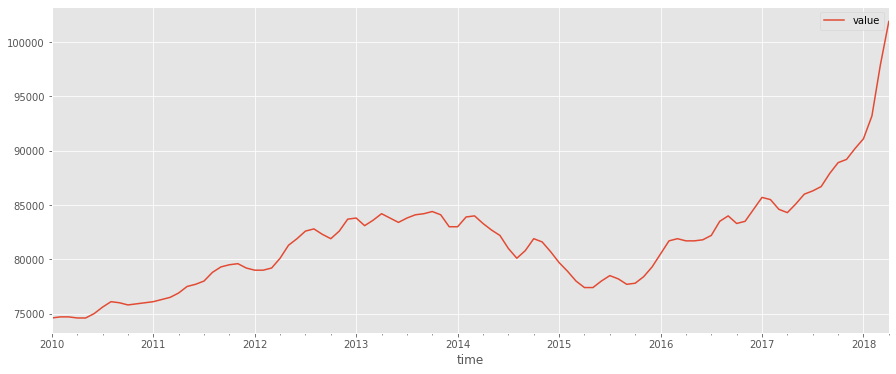

              value
time               
2010-01-01  74600.0
2010-02-01  74700.0
2010-03-01  74700.0
2010-04-01  74600.0
2010-05-01  74600.0


In [9]:
#ts1 = melted_zip2['value'].resample('MS').mean()
ts1 = ts1.fillna(ts1.bfill())
ts1.plot(figsize=(15,6))
plt.show()

print(ts1.head())

In [82]:
# from statsmodels.tsa.stattools import adfuller

# dftest = adfuller(ts1['value'])

# # Extract and display test results in a user friendly manner
# dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
# for key,value in dftest[4].items():
#     dfoutput['Critical Value (%s)'%key] = value

# print(dftest)

# print ('Results of Dickey-Fuller test: \n')

# print(dfoutput)

In [58]:
# # Difference the time series
# ts1_diff = ts1.diff().dropna()
# ts1_diff

In [59]:
# ts1_diff.plot(figsize=(15,6))
# plt.show()


In [10]:
warnings.filterwarnings('ignore')
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)  

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 1) for x in list(itertools.product(p, d, q))]

In [11]:
warnings.filterwarnings('ignore')
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts1,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue  

ARIMA (0, 0, 0) x (0, 0, 0, 1)12 : AIC Calculated =2522.747142857441
ARIMA (0, 0, 0) x (0, 0, 1, 1)12 : AIC Calculated =2429.104018723881
ARIMA (0, 0, 0) x (0, 0, 2, 1)12 : AIC Calculated =2353.8368434256968
ARIMA (0, 0, 0) x (0, 1, 0, 1)12 : AIC Calculated =1614.4617774475305
ARIMA (0, 0, 0) x (0, 1, 1, 1)12 : AIC Calculated =1516.3745628221416
ARIMA (0, 0, 0) x (0, 1, 2, 1)12 : AIC Calculated =1469.4499206725054
ARIMA (0, 0, 0) x (0, 2, 0, 1)12 : AIC Calculated =1536.4163131312475
ARIMA (0, 0, 0) x (0, 2, 1, 1)12 : AIC Calculated =1511.2888879162797
ARIMA (0, 0, 0) x (0, 2, 2, 1)12 : AIC Calculated =1478.4098950065936
ARIMA (0, 0, 0) x (1, 0, 0, 1)12 : AIC Calculated =1620.7954900874297
ARIMA (0, 0, 0) x (1, 0, 1, 1)12 : AIC Calculated =1526.2170500371155
ARIMA (0, 0, 0) x (1, 0, 2, 1)12 : AIC Calculated =1507.9457294427714
ARIMA (0, 0, 0) x (1, 1, 0, 1)12 : AIC Calculated =1546.873761763731
ARIMA (0, 0, 0) x (1, 1, 1, 1)12 : AIC Calculated =1505.7194270238788
ARIMA (0, 0, 0) x (1, 1

ARIMA (0, 1, 1) x (1, 0, 1, 1)12 : AIC Calculated =1479.1958555349406
ARIMA (0, 1, 1) x (1, 0, 2, 1)12 : AIC Calculated =1455.9903122305102
ARIMA (0, 1, 1) x (1, 1, 0, 1)12 : AIC Calculated =1501.6543230076334
ARIMA (0, 1, 1) x (1, 1, 1, 1)12 : AIC Calculated =1476.1677059616143
ARIMA (0, 1, 1) x (1, 1, 2, 1)12 : AIC Calculated =1449.904052810299
ARIMA (0, 1, 1) x (1, 2, 0, 1)12 : AIC Calculated =1548.6880662728838
ARIMA (0, 1, 1) x (1, 2, 1, 1)12 : AIC Calculated =1495.6298256006344
ARIMA (0, 1, 1) x (1, 2, 2, 1)12 : AIC Calculated =1446.180966580109
ARIMA (0, 1, 1) x (2, 0, 0, 1)12 : AIC Calculated =1499.6171483907938
ARIMA (0, 1, 1) x (2, 0, 1, 1)12 : AIC Calculated =1480.0756559274232
ARIMA (0, 1, 1) x (2, 0, 2, 1)12 : AIC Calculated =1463.135557523931
ARIMA (0, 1, 1) x (2, 1, 0, 1)12 : AIC Calculated =1482.297774912924
ARIMA (0, 1, 1) x (2, 1, 1, 1)12 : AIC Calculated =1466.811802426392
ARIMA (0, 1, 1) x (2, 1, 2, 1)12 : AIC Calculated =1443.4652328474072
ARIMA (0, 1, 1) x (2, 2, 

ARIMA (0, 2, 2) x (2, 0, 2, 1)12 : AIC Calculated =1431.2269532536443
ARIMA (0, 2, 2) x (2, 1, 0, 1)12 : AIC Calculated =1477.9197652975627
ARIMA (0, 2, 2) x (2, 1, 1, 1)12 : AIC Calculated =1459.0044929440874
ARIMA (0, 2, 2) x (2, 1, 2, 1)12 : AIC Calculated =1417.6324089180373
ARIMA (0, 2, 2) x (2, 2, 0, 1)12 : AIC Calculated =1503.8881845714675
ARIMA (0, 2, 2) x (2, 2, 1, 1)12 : AIC Calculated =1466.3234597272601
ARIMA (0, 2, 2) x (2, 2, 2, 1)12 : AIC Calculated =1461.386921026861
ARIMA (1, 0, 0) x (0, 0, 0, 1)12 : AIC Calculated =1620.7954900874297
ARIMA (1, 0, 0) x (0, 0, 1, 1)12 : AIC Calculated =1551.7747100045976
ARIMA (1, 0, 0) x (0, 0, 2, 1)12 : AIC Calculated =1528.1153467971146
ARIMA (1, 0, 0) x (0, 1, 0, 1)12 : AIC Calculated =1546.873761763731
ARIMA (1, 0, 0) x (0, 1, 1, 1)12 : AIC Calculated =1506.8260951987697
ARIMA (1, 0, 0) x (0, 1, 2, 1)12 : AIC Calculated =1469.1046079209468
ARIMA (1, 0, 0) x (0, 2, 0, 1)12 : AIC Calculated =1536.7762332380141
ARIMA (1, 0, 0) x (0, 

ARIMA (1, 1, 1) x (0, 1, 0, 1)12 : AIC Calculated =1501.6543230233874
ARIMA (1, 1, 1) x (0, 1, 1, 1)12 : AIC Calculated =1476.1677059505023
ARIMA (1, 1, 1) x (0, 1, 2, 1)12 : AIC Calculated =1449.9040527547106
ARIMA (1, 1, 1) x (0, 2, 0, 1)12 : AIC Calculated =1548.6880662703206
ARIMA (1, 1, 1) x (0, 2, 1, 1)12 : AIC Calculated =1484.8938452142372
ARIMA (1, 1, 1) x (0, 2, 2, 1)12 : AIC Calculated =1446.0171721165523
ARIMA (1, 1, 1) x (1, 0, 0, 1)12 : AIC Calculated =1499.7290871050695
ARIMA (1, 1, 1) x (1, 0, 1, 1)12 : AIC Calculated =1481.2830610221818
ARIMA (1, 1, 1) x (1, 0, 2, 1)12 : AIC Calculated =1466.411306945024
ARIMA (1, 1, 1) x (1, 1, 0, 1)12 : AIC Calculated =1502.795532711687
ARIMA (1, 1, 1) x (1, 1, 1, 1)12 : AIC Calculated =1489.5136543224878
ARIMA (1, 1, 1) x (1, 1, 2, 1)12 : AIC Calculated =1451.5508872523442
ARIMA (1, 1, 1) x (1, 2, 0, 1)12 : AIC Calculated =1545.874800636506
ARIMA (1, 1, 1) x (1, 2, 1, 1)12 : AIC Calculated =1490.8704957718319
ARIMA (1, 1, 1) x (1, 2

ARIMA (1, 2, 2) x (1, 1, 1, 1)12 : AIC Calculated =1447.471641272982
ARIMA (1, 2, 2) x (1, 1, 2, 1)12 : AIC Calculated =1425.23115668318
ARIMA (1, 2, 2) x (1, 2, 0, 1)12 : AIC Calculated =1531.059619165932
ARIMA (1, 2, 2) x (1, 2, 1, 1)12 : AIC Calculated =1472.0106939198063
ARIMA (1, 2, 2) x (1, 2, 2, 1)12 : AIC Calculated =1467.6667897610075
ARIMA (1, 2, 2) x (2, 0, 0, 1)12 : AIC Calculated =1463.7732581690805
ARIMA (1, 2, 2) x (2, 0, 1, 1)12 : AIC Calculated =1445.4315431616685
ARIMA (1, 2, 2) x (2, 0, 2, 1)12 : AIC Calculated =1435.2455115982111
ARIMA (1, 2, 2) x (2, 1, 0, 1)12 : AIC Calculated =1459.5415405483002
ARIMA (1, 2, 2) x (2, 1, 1, 1)12 : AIC Calculated =1435.0930670033092
ARIMA (1, 2, 2) x (2, 1, 2, 1)12 : AIC Calculated =1419.4477534379232
ARIMA (1, 2, 2) x (2, 2, 0, 1)12 : AIC Calculated =1501.4740593775334
ARIMA (1, 2, 2) x (2, 2, 1, 1)12 : AIC Calculated =1464.5901657895006
ARIMA (1, 2, 2) x (2, 2, 2, 1)12 : AIC Calculated =1468.5530057660917
ARIMA (2, 0, 0) x (0, 0,

ARIMA (2, 1, 0) x (2, 1, 2, 1)12 : AIC Calculated =1442.275158843395
ARIMA (2, 1, 0) x (2, 2, 0, 1)12 : AIC Calculated =1464.0139070054872
ARIMA (2, 1, 0) x (2, 2, 1, 1)12 : AIC Calculated =1459.3845242957984
ARIMA (2, 1, 0) x (2, 2, 2, 1)12 : AIC Calculated =1456.740601827697
ARIMA (2, 1, 1) x (0, 0, 0, 1)12 : AIC Calculated =1499.6171929369054
ARIMA (2, 1, 1) x (0, 0, 1, 1)12 : AIC Calculated =1496.0989920204754
ARIMA (2, 1, 1) x (0, 0, 2, 1)12 : AIC Calculated =1465.862038275439
ARIMA (2, 1, 1) x (0, 1, 0, 1)12 : AIC Calculated =1482.2991370923387
ARIMA (2, 1, 1) x (0, 1, 1, 1)12 : AIC Calculated =1466.875464883643
ARIMA (2, 1, 1) x (0, 1, 2, 1)12 : AIC Calculated =1443.2584500680412
ARIMA (2, 1, 1) x (0, 2, 0, 1)12 : AIC Calculated =1504.5489480882138
ARIMA (2, 1, 1) x (0, 2, 1, 1)12 : AIC Calculated =1476.3938432785621
ARIMA (2, 1, 1) x (0, 2, 2, 1)12 : AIC Calculated =1459.0044904413796
ARIMA (2, 1, 1) x (1, 0, 0, 1)12 : AIC Calculated =1483.9120616309863
ARIMA (2, 1, 1) x (1, 0,

ARIMA (2, 2, 2) x (0, 2, 0, 1)12 : AIC Calculated =1503.9445813738641
ARIMA (2, 2, 2) x (0, 2, 1, 1)12 : AIC Calculated =1466.323459909176
ARIMA (2, 2, 2) x (0, 2, 2, 1)12 : AIC Calculated =1437.5186800938181
ARIMA (2, 2, 2) x (1, 0, 0, 1)12 : AIC Calculated =1463.7783960894815
ARIMA (2, 2, 2) x (1, 0, 1, 1)12 : AIC Calculated =1445.3466515030357
ARIMA (2, 2, 2) x (1, 0, 2, 1)12 : AIC Calculated =1435.2886844155678
ARIMA (2, 2, 2) x (1, 1, 0, 1)12 : AIC Calculated =1459.3480873944038
ARIMA (2, 2, 2) x (1, 1, 1, 1)12 : AIC Calculated =1435.0930669508068
ARIMA (2, 2, 2) x (1, 1, 2, 1)12 : AIC Calculated =1419.447758546644
ARIMA (2, 2, 2) x (1, 2, 0, 1)12 : AIC Calculated =1501.5555078438404
ARIMA (2, 2, 2) x (1, 2, 1, 1)12 : AIC Calculated =1451.5831450494595
ARIMA (2, 2, 2) x (1, 2, 2, 1)12 : AIC Calculated =1449.1828937351968
ARIMA (2, 2, 2) x (2, 0, 0, 1)12 : AIC Calculated =1442.275158783436
ARIMA (2, 2, 2) x (2, 0, 1, 1)12 : AIC Calculated =1444.1969999624764
ARIMA (2, 2, 2) x (2, 0

In [12]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq        (2, 1, 2)
pdqs    (0, 2, 2, 1)
aic          1417.63
Name: 629, dtype: object

In [12]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(ts1, 
                                        order=(2, 1, 2), 
                                        seasonal_order=(0, 2, 2, 1), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

print(output.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1502      0.310      0.485      0.628      -0.457       0.757
ar.L2         -0.4016      0.208     -1.929      0.054      -0.810       0.006
ma.L1         -0.4109    3.7e+04  -1.11e-05      1.000   -7.25e+04    7.25e+04
ma.L2         -0.4206   3.27e+04  -1.29e-05      1.000   -6.41e+04    6.41e+04
ma.S.L1       -0.4110    3.7e+04  -1.11e-05      1.000   -7.25e+04    7.25e+04
ma.S.L2       -0.4206   3.27e+04  -1.29e-05      1.000   -6.41e+04    6.41e+04
sigma2      2.409e+05   2.53e+04      9.523      0.000    1.91e+05    2.91e+05


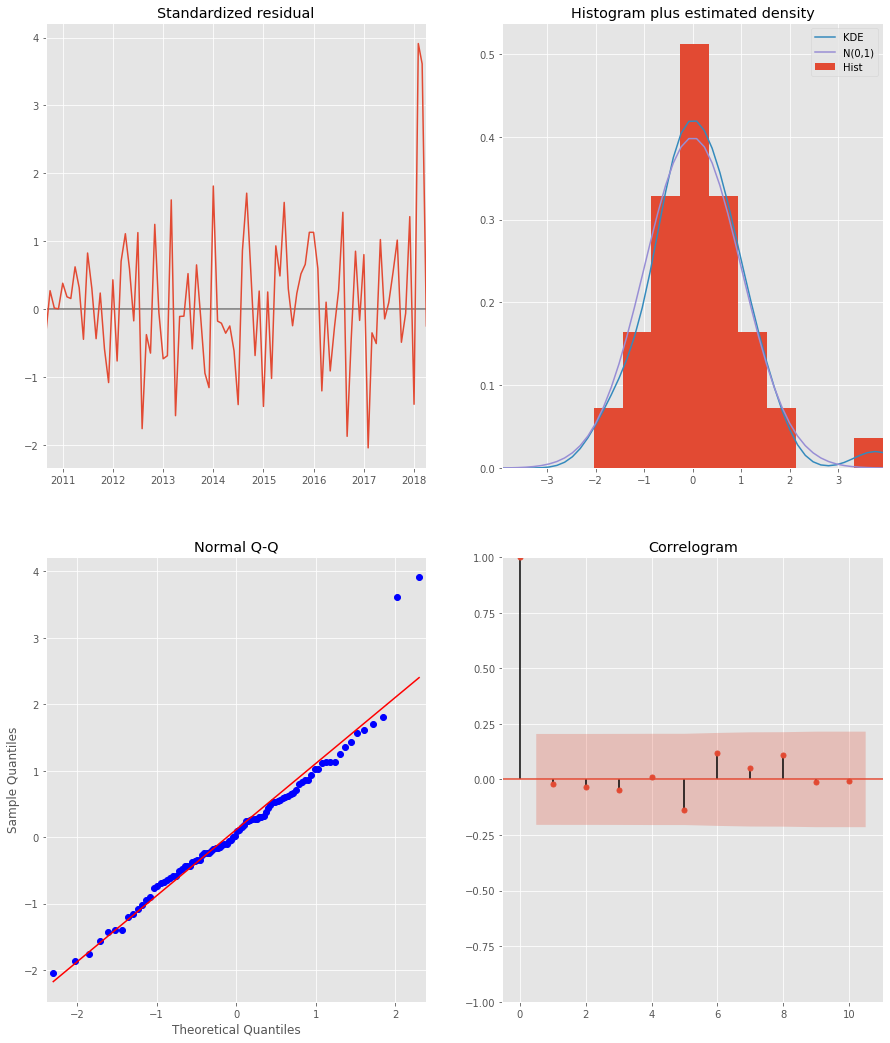

In [13]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 18))
plt.show()

## One-step Ahead Forecasting

In [16]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_conf = pred.conf_int()

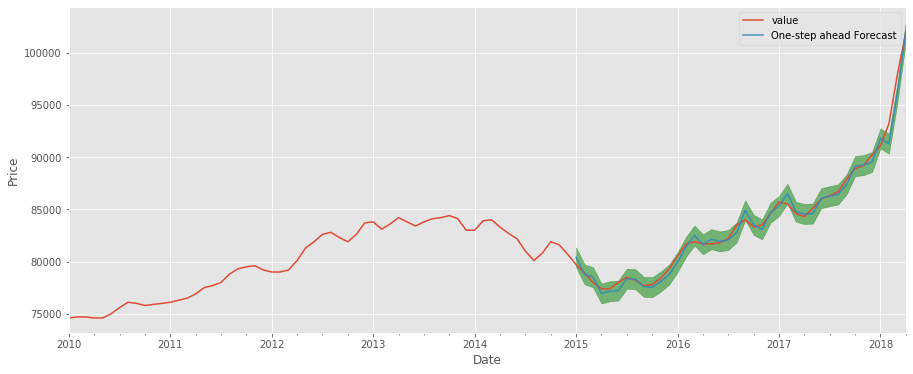

In [15]:
# Plot real vs predicted values along with confidence interval

rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = ts1['2010-01-01':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()

plt.show()

In [165]:
# pred.predicted_mean

In [17]:
# Get the real and predicted values
ts1_forecasted = pred.predicted_mean
ts1_truth = ts1['2016-01-01':]
mse = mean_squared_error(ts1_truth, ts1_forecasted)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))




The Root Mean Squared Error of our forecasts is 660.02


## Dynamic Forecasting

In [18]:
# Get dynamic predictions with confidence intervals as above 
pred_dynamic = output.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=True, full_results=True)
pred_dynamic_conf = pred_dynamic.conf_int()

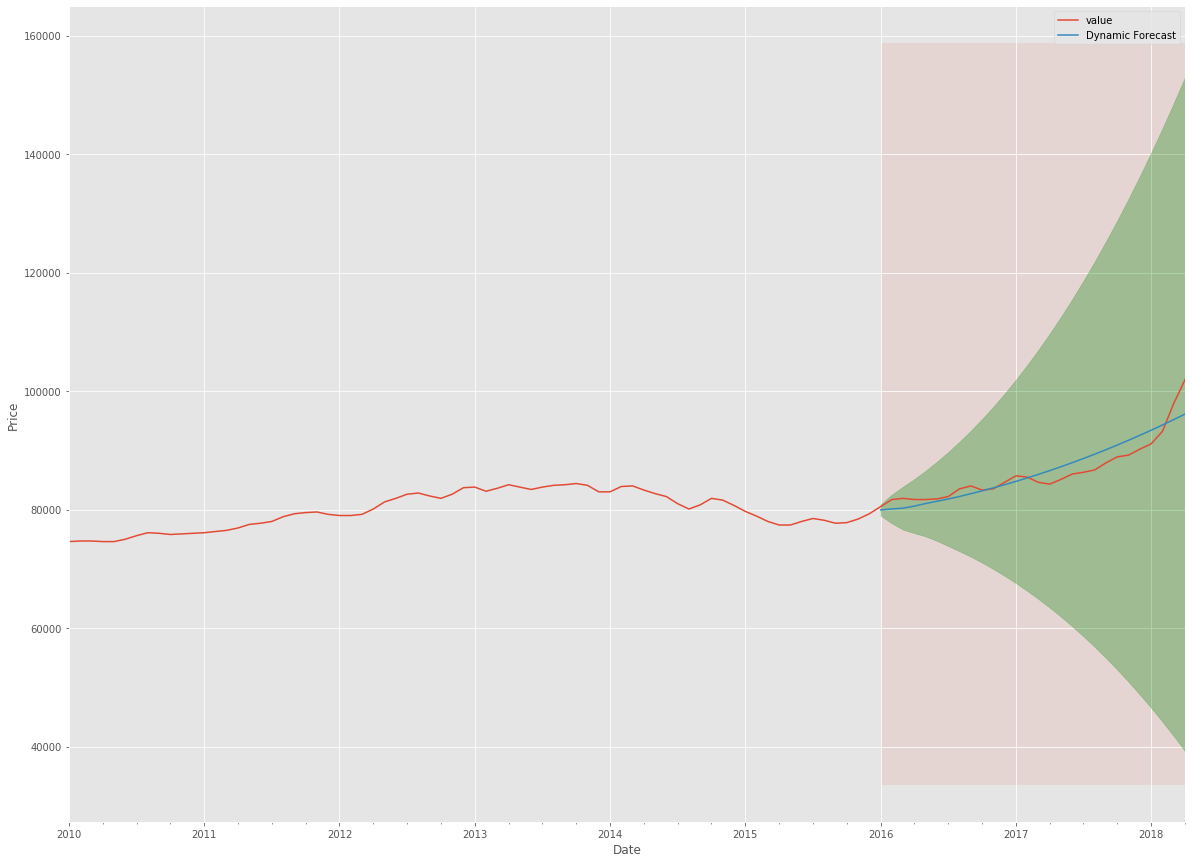

In [19]:
# Plot the dynamic forecast with confidence intervals.

ax = ts1['2010':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_conf.index,
                pred_dynamic_conf.iloc[:, 0],
                pred_dynamic_conf.iloc[:, 1], color='g', alpha=.3)


ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2016-01-01'), ts1_forecasted.index[-1], alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [20]:
# Get the real and predicted values
ts1_forecasted = pred_dynamic.predicted_mean
ts1_truth = ts1['2016-01-01':]
mse = mean_squared_error(ts1_truth, ts1_forecasted)
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 1960.96


In [21]:
print(mse)

3845367.2994093746


## Producing and visualising forecasts

In [22]:
# Get forecast 500 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

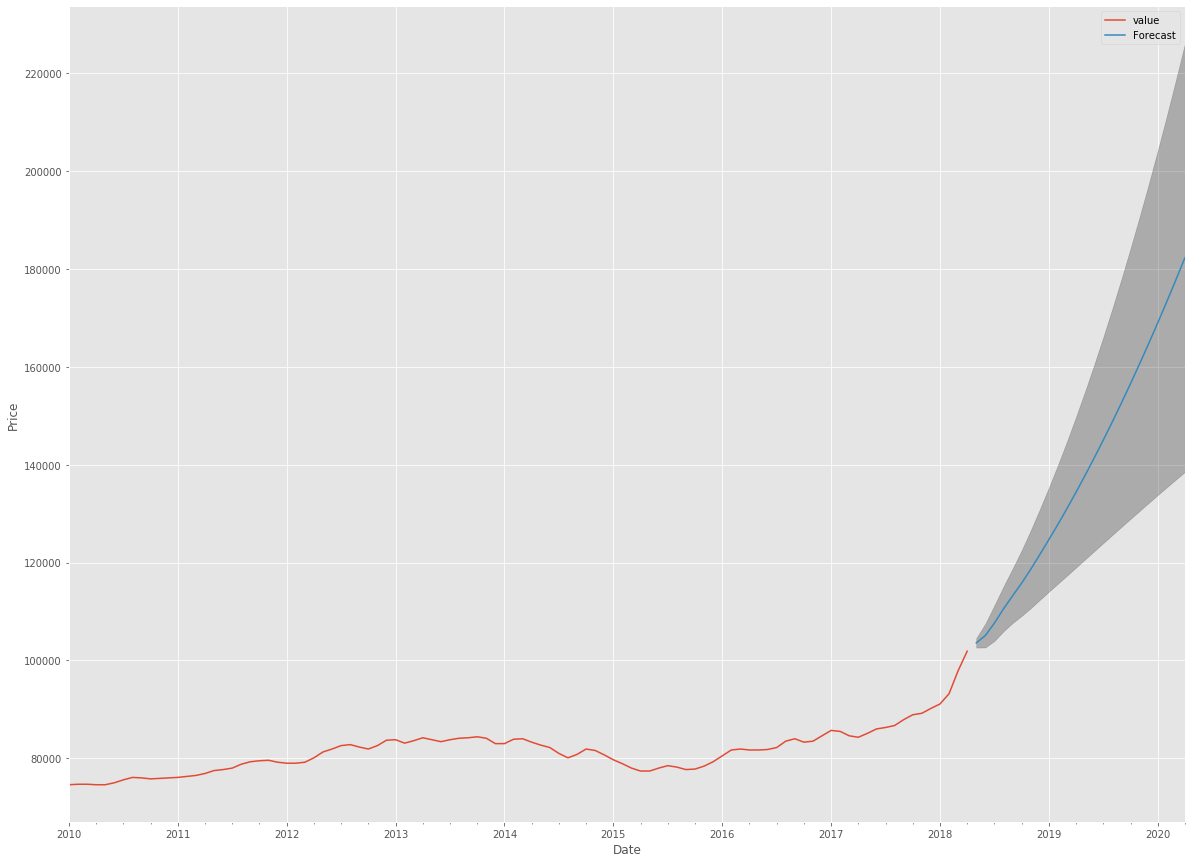

In [23]:
# Plot future predictions with confidence intervals
ax = ts1.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price')

plt.legend()
plt.show()

In [23]:
# predicted value on Jan 1st 2020?
prediction.predicted_mean['2020-01-01']

168984.9503860841

In [24]:
# ROI
print((prediction.predicted_mean['2020-01-01']/ts1['2018-01'])-1)

               value
time                
2018-01-01  0.854939
